### Height Prediction
- Step 1 : Import Necessary Libraries
- Step 2 : Import Data
- Step 3 : Data Understanding
- Step 4 : Data Preparation

In [1]:
import pandas as pd #Import Necessary Libraries
import matplotlib.pyplot as plt

In [2]:
weight_height=pd.read_csv("weight-height.csv") #import Data, Data Understanding
weight_height

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
weight_height.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
 weight_height.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [6]:
#Feature Engineering - Concepts of whatever you do with features 

#### Converting Heights from Inches to cm and Weights from pounds to kg

In [7]:
#copying the data for backup
weight_copy = weight_height.copy()

In [8]:
weight_copy

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [9]:
del weight_copy['Gender']

In [10]:
weight_copy

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [11]:
weight_copy['Height_cm'] = weight_copy['Height']*2.54 #converting Inches to cm

In [12]:
weight_copy

,Height,Weight,Height_cm
0,73.847017,241.893563,187.571423
1,68.781904,162.310473,174.706036
2,74.110105,212.740856,188.239668
3,71.730978,220.042470,182.196685
4,69.881796,206.349801,177.499761
...,...,...,...
9995,66.172652,136.777454,168.078536
9996,67.067155,170.867906,170.350573
9997,63.867992,128.475319,162.224700
9998,69.034243,163.852461,175.346978


In [13]:
weight_copy['weight_kg'] = weight_copy['Weight']/2.205

In [14]:
weight_copy

,Height,Weight,Height_cm,weight_kg
0,73.847017,241.893563,187.571423,109.702296
1,68.781904,162.310473,174.706036,73.610192
2,74.110105,212.740856,188.239668,96.481114
3,71.730978,220.042470,182.196685,99.792504
4,69.881796,206.349801,177.499761,93.582676
...,...,...,...,...
9995,66.172652,136.777454,168.078536,62.030591
9996,67.067155,170.867906,170.350573,77.491114
9997,63.867992,128.475319,162.224700,58.265451
9998,69.034243,163.852461,175.346978,74.309506


In [15]:
weight_copy.drop(['Height','Weight'],axis=1,inplace=True)

In [16]:
weight_copy

,Height_cm,weight_kg
0,187.571423,109.702296
1,174.706036,73.610192
2,188.239668,96.481114
3,182.196685,99.792504
4,177.499761,93.582676
...,...,...
9995,168.078536,62.030591
9996,170.350573,77.491114
9997,162.224700,58.265451
9998,175.346978,74.309506


### Assumptions test

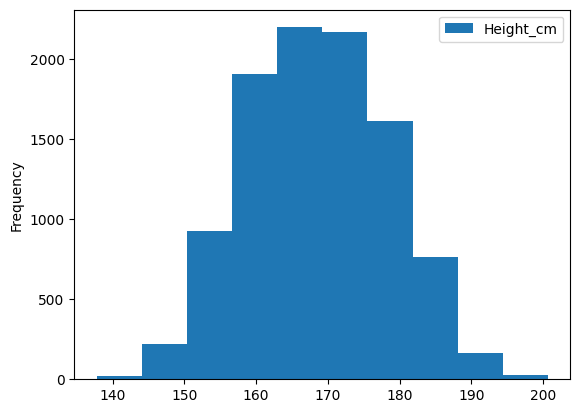

In [17]:
weight_copy.plot.hist(x='weight_kg')
plt.show()

#### Linearity Test

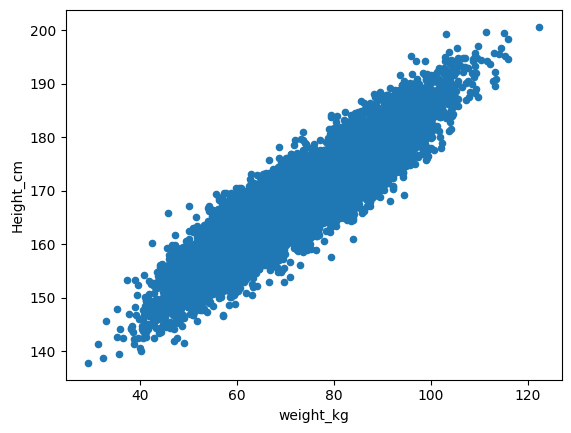

In [18]:
weight_copy.plot.scatter(x='weight_kg',y='Height_cm')
plt.show() # Follows Linearity

In [19]:
weight_copy.corr()

,Height_cm,weight_kg
Height_cm,1.000000,0.924756
weight_kg,0.924756,1.000000


#### Steps to get the data is linear
- Step 1 : Scatter plot
- Step 2 : Correlation Matrix
- Step 3 : No Multilinearity
- Step 4 : No Autoregression
#### Post Test
- Step 5 : Homoscaracity Test
- Step 6 : Zero Residual Test

In [64]:
x= weight_copy[['weight_kg']]
y= weight_copy[['Height_cm']]

In [65]:
y

,Height_cm
0,187.571423
1,174.706036
2,188.239668
3,182.196685
4,177.499761
...,...
9995,168.078536
9996,170.350573
9997,162.224700
9998,175.346978


In [66]:
from sklearn.linear_model import LinearRegression
ml_model = LinearRegression()

In [73]:
ml_model.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [74]:
ml_model.coef_

array([[0.62062922]])

In [75]:
ml_model.intercept_

array([123.13387264])

In [76]:
weight_copy[['weight_kg']]

,weight_kg
0,109.702296
1,73.610192
2,96.481114
3,99.792504
4,93.582676
...,...
9995,62.030591
9996,77.491114
9997,58.265451
9998,74.309506


#### Prediction

In [78]:
y_pred = ml_model.predict(x)

In [81]:
y

,Height_cm
0,187.571423
1,174.706036
2,188.239668
3,182.196685
4,177.499761
...,...
9995,168.078536
9996,170.350573
9997,162.224700
9998,175.346978


In [82]:
y_pred

array([[191.21832319],
       [168.81850845],
       [183.01287094],
       ...,
       [159.29511386],
       [169.25252357],
       [155.12206037]], shape=(10000, 1))

In [85]:
error = y-y_pred
error

,Height_cm
0,-3.646900
1,5.887528
2,5.226797
3,-2.871331
4,-3.714254
...,...
9995,6.446666
9996,-0.876549
9997,2.929586
9998,6.094454


In [86]:
error.mean()

Height_cm    1.664375e-14
dtype: float64

#### Post Check for Model

##### HomoScarasticity

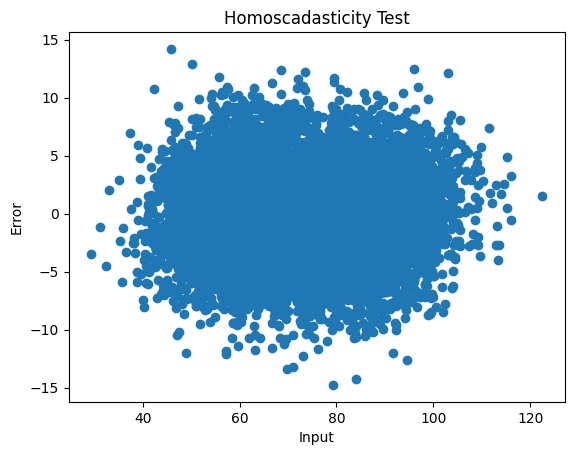

In [91]:
plt.scatter(x=weight_copy['weight_kg'],y=error)
plt.xlabel('Input')
plt.ylabel('Error')
plt.title('Homoscadasticity Test')
plt.show()

##### Zero Residual Mean Test

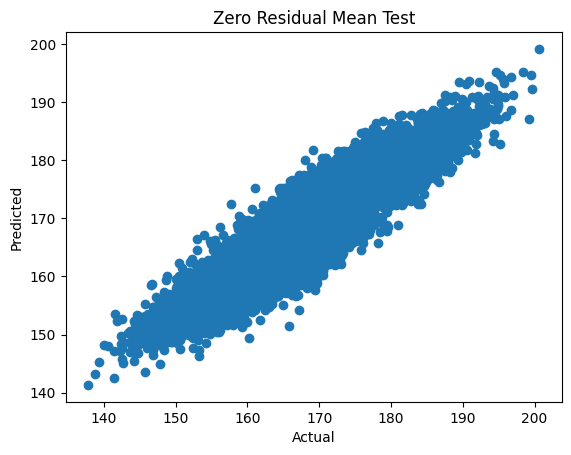

In [90]:
plt.scatter(x=y,y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Zero Residual Mean Test')
plt.show()

#### Model Deployment

In [92]:
from pickle import dump

In [93]:
dump(ml_model,open('height_predictor.pk1','wb')) #creating pickle binary file and the type is wb

In [94]:
from pickle import load

In [95]:
loaded_model = load(open('height_predictor.pk1','rb'))

In [96]:
loaded_model.predict(x)

array([[191.21832319],
       [168.81850845],
       [183.01287094],
       ...,
       [159.29511386],
       [169.25252357],
       [155.12206037]], shape=(10000, 1))